In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchirico/montcoalert")
print(path)

/kaggle/input/montcoalert


In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
df = pd.read_csv('/kaggle/input/montcoalert/911.csv')

In [210]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [212]:
df.drop(columns='e', inplace=True)

In [213]:
# Top 5 Zip Codes for 911 Calls

df['zip'].value_counts().head(5)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


In [214]:
# Top 5 Townships for 911 Calls

df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


In [215]:
# Unique Title Names

df['title'].nunique()

148

In [216]:
# Split Title

df[['reason', 'description']] = df['title'].str.split(':', expand=True)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,description
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,VEHICLE ACCIDENT -
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,GENERAL WEAKNESS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,VEHICLE ACCIDENT
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,BUILDING FIRE


In [217]:
df['reason'].nunique()

3

In [218]:
# Most common reasons for 911 calls

df['reason'].value_counts()

,count
reason,
EMS,332692
Traffic,230208
Fire,100622


In [219]:
sns.set_style('darkgrid')

<ipython-input-220-b344b42d2325>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reason', data=df, palette='viridis')


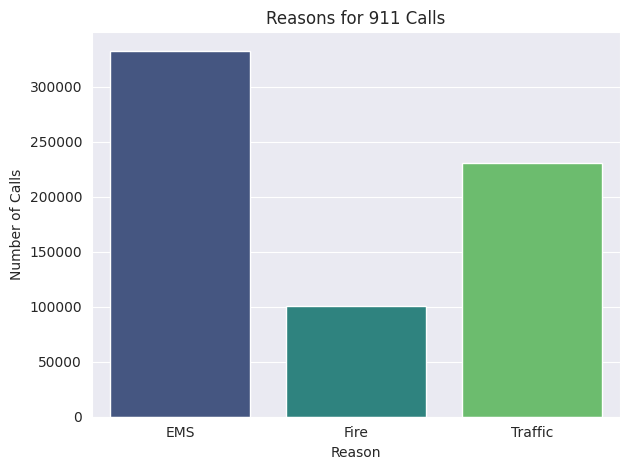

In [220]:
sns.countplot(x='reason', data=df, palette='viridis')
plt.title('Reasons for 911 Calls')
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

In [221]:
print(df['timeStamp'].iloc[0], type(df['timeStamp'].iloc[0]))

2015-12-10 17:10:52 <class 'str'>


In [222]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].iloc[0].day

10

In [223]:
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [224]:
df['day'] = df['timeStamp'].apply(lambda time: day_map[time.dayofweek])
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,description,day,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thu,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thu,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thu,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thu,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,Thu,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,VEHICLE ACCIDENT -,Wed,15,7
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,GENERAL WEAKNESS,Wed,15,7
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,VEHICLE ACCIDENT,Wed,15,7
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,BUILDING FIRE,Wed,15,7


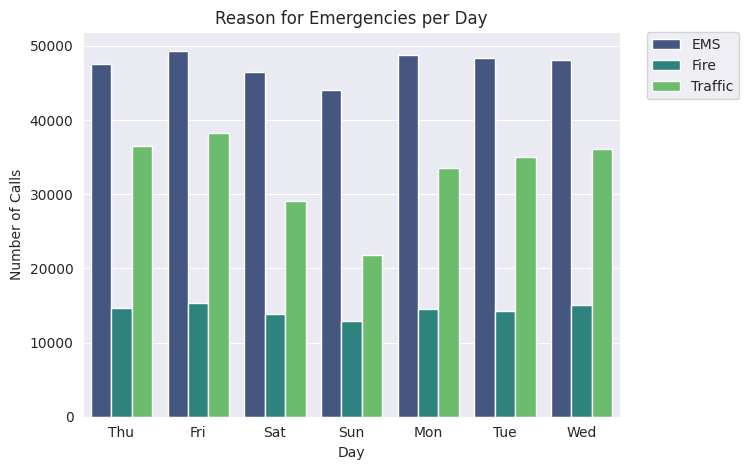

In [225]:
sns.countplot(x='day', hue='reason', data=df, palette='viridis')
plt.title('Reason for Emergencies per Day')
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

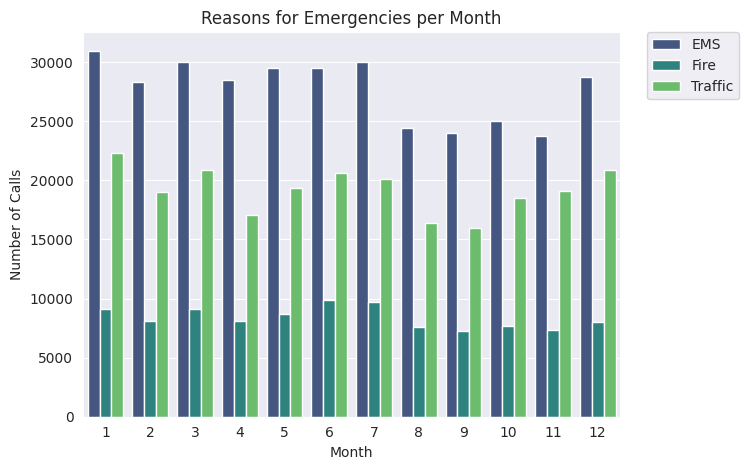

In [226]:
sns.countplot(x='month', hue='reason', data=df, palette='viridis')
plt.title('Reasons for Emergencies per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [227]:
by_month = df.groupby('month').count()
by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,description,day,hour
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


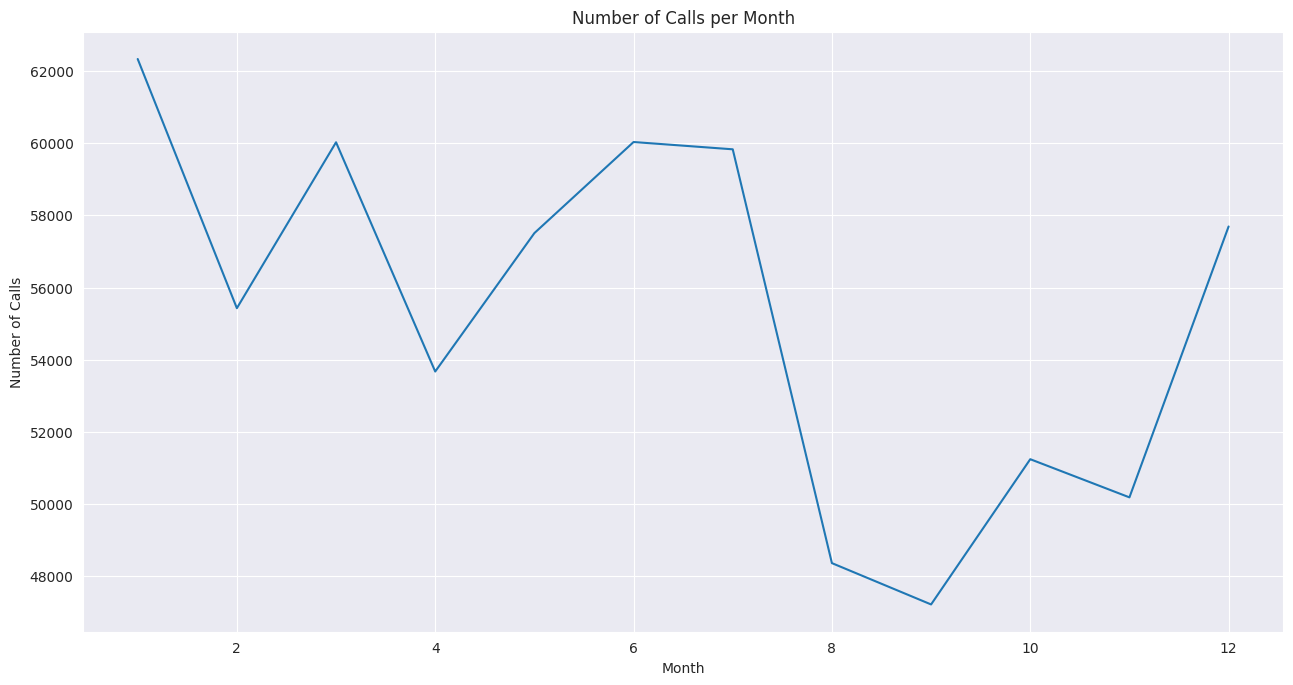

In [228]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(by_month.index, by_month['lat'])
ax.set_xlabel('Month')
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Calls per Month')
plt.show()

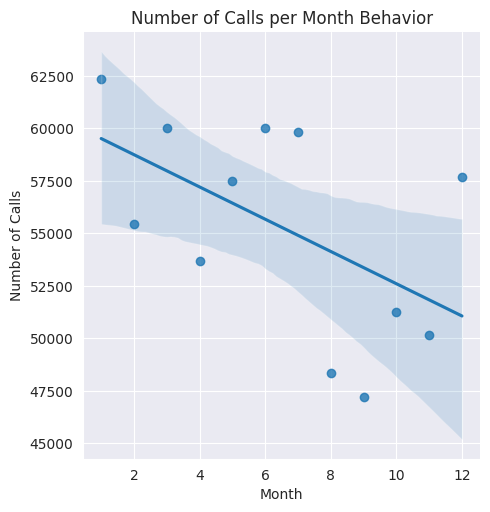

In [229]:
sns.lmplot(x='month', y='lat', data=by_month.reset_index())
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per Month Behavior')
plt.show()

In [230]:
df['date'] = df['timeStamp'].apply(lambda time: time.date())

In [231]:
by_date = df.groupby('date').count()
by_date

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,description,day,hour,month
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


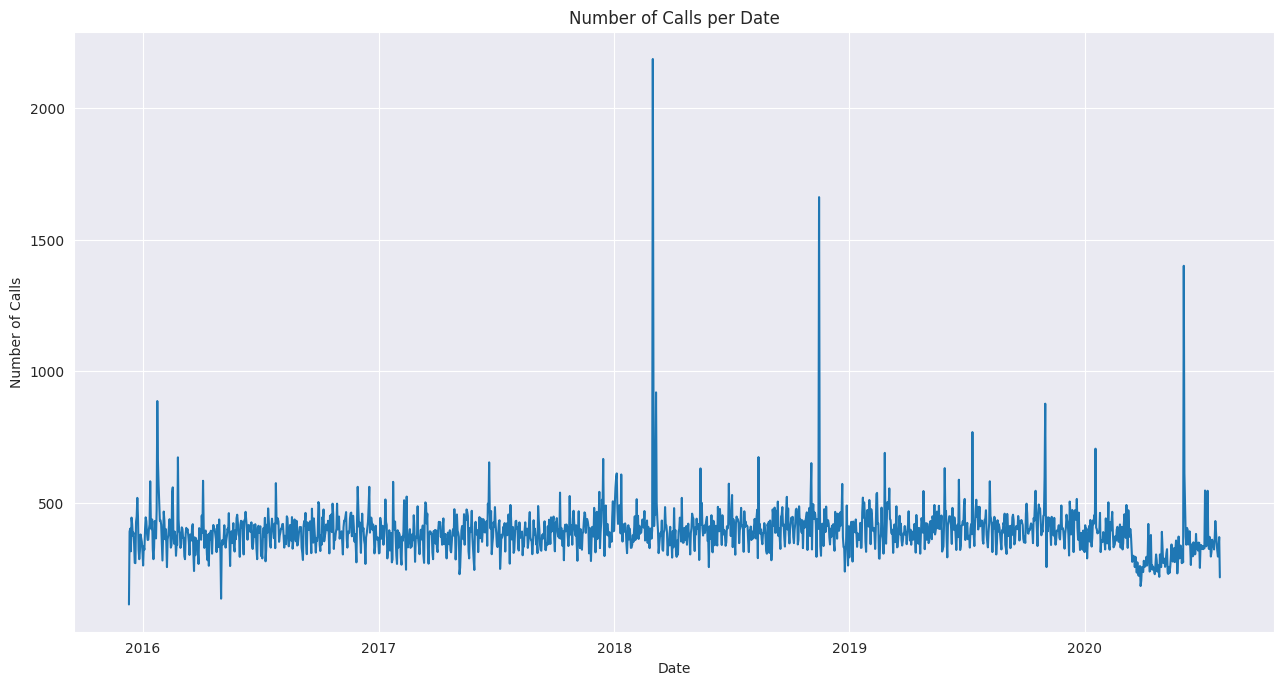

In [232]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(by_date.index, by_date['lat'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Calls per Date')
plt.show()

In [233]:
by_reason = df.groupby(['reason', 'month']).count()
by_reason

lat    lng   desc    zip  title  timeStamp    twp   addr  \
reason  month                                                               
EMS     1      30970  30970  30970  28630  30970      30970  30953  30970   
        2      28329  28329  28329  26046  28329      28329  28311  28329   
        3      29989  29989  29989  27671  29989      29989  29970  29989   
        4      28485  28485  28485  26190  28485      28485  28474  28485   
        5      29473  29473  29473  26958  29473      29473  29449  29473   
        6      29512  29512  29512  26886  29512      29512  29490  29512   
        7      30027  30027  30027  27467  30027      30027  30006  30027   
        8      24410  24410  24410  22252  24410      24410  24391  24410   
        9      23982  23982  23982  21849  23982      23982  23971  23982   
        10     25025  25025  25025  22719  25025      25025  25012  25025   
        11     23715  23715  23715  21704  23715      23715  23696  23715   
        12     28775  28775  28775  26483  28775      28775  28757  28775   
Fire    1       9087   9087   9087   8076   9087       9087   9080   9087   
        2       8092   8092   8092   7125   8092       8092   8088   8092   
        3       9135   9135   9135   8120   9135       9135   9128   9135   
        4       8132   8132   8132   7199   8132       8132   8127   8132   
        5       8691   8691   8691   7628   8691       8691   8680   8691   
        6       9879   9879   9879   8739   9879       9879   9873   9879   
        7       9665   9665   9665   8564   9665       9665   9658   9665   
        8       7598   7598   7598   6670   7598       7598   7593   7598   
        9       7258   7258   7258   6370   7258       7258   7252   7258   
        10      7683   7683   7683   6767   7683       7683   7676   7683   
        11      7350   7350   7350   6455   7350       7350   7345   7350   
        12      8052   8052   8052   7154   8052       8052   8045   8052   
Traffic 1      22279  22279  22279  18588  22279      22279  22279  22279   
        2      19006  19006  19006  15751  19006      19006  19006  19006   
        3      20903  20903  20903  17461  20903      20903  20903  20903   
        4      17054  17054  17054  13960  17054      17054  17054  17054   
        5      19345  19345  19345  15768  19345      19345  19345  19345   
        6      20643  20643  20643  16968  20643      20643  20642  20643   
        7      20140  20140  20140  16476  20140      20140  20138  20140   
        8      16351  16351  16351  13389  16351      16351  16351  16351   
        9      15973  15973  15973  13070  15973      15973  15973  15973   
        10     18532  18532  18532  15096  18532      18532  18532  18532   
        11     19117  19117  19117  15928  19117      19117  19116  19117   
        12     20865  20865  20865  17146  20865      20865  20865  20865   

               description    day   hour   date  
reason  month                                    
EMS     1            30970  30970  30970  30970  
        2            28329  28329  28329  28329  
        3            29989  29989  29989  29989  
        4            28485  28485  28485  28485  
        5            29473  29473  29473  29473  
        6            29512  29512  29512  29512  
        7            30027  30027  30027  30027  
        8            24410  24410  24410  24410  
        9            23982  23982  23982  23982  
        10           25025  25025  25025  25025  
        11           23715  23715  23715  23715  
        12           28775  28775  28775  28775  
Fire    1             9087   9087   9087   9087  
        2             8092   8092   8092   8092  
        3             9135   9135   9135   9135  
        4             8132   8132   8132   8132  
        5             8691   8691   8691   8691  
        6             9879   9879   9879   9879  
        7             9665   9665   9665   9665  
        8             7598   7598   7598

In [234]:
by_reason.loc['EMS']

,lat,lng,desc,zip,title,timeStamp,twp,addr,description,day,hour,date
month,,,,,,,,,,,,
1,30970,30970,30970,28630,30970,30970,30953,30970,30970,30970,30970,30970
2,28329,28329,28329,26046,28329,28329,28311,28329,28329,28329,28329,28329
3,29989,29989,29989,27671,29989,29989,29970,29989,29989,29989,29989,29989
4,28485,28485,28485,26190,28485,28485,28474,28485,28485,28485,28485,28485
5,29473,29473,29473,26958,29473,29473,29449,29473,29473,29473,29473,29473
6,29512,29512,29512,26886,29512,29512,29490,29512,29512,29512,29512,29512
7,30027,30027,30027,27467,30027,30027,30006,30027,30027,30027,30027,30027
8,24410,24410,24410,22252,24410,24410,24391,24410,24410,24410,24410,24410
9,23982,23982,23982,21849,23982,23982,23971,23982,23982,23982,23982,23982


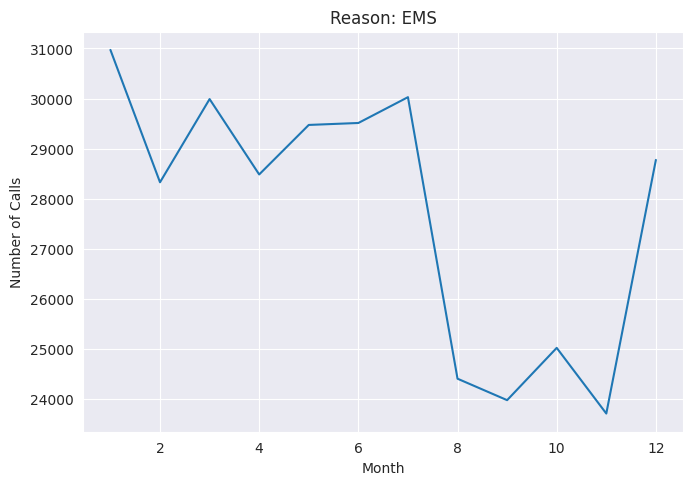

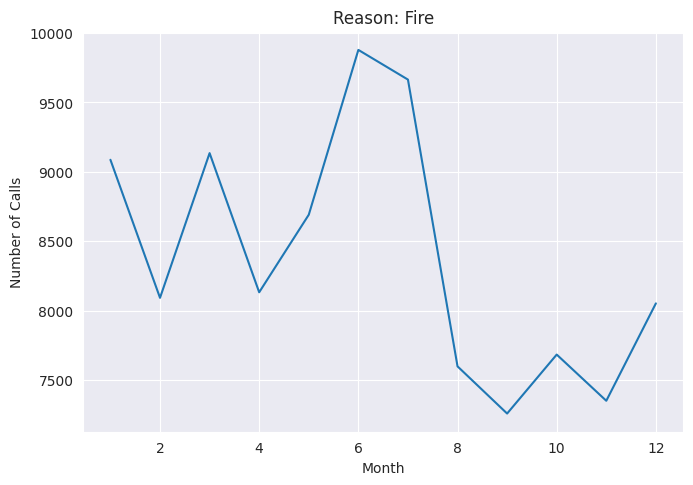

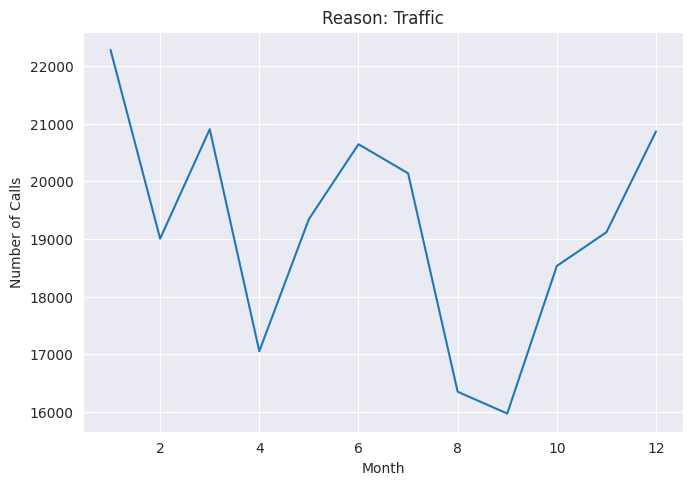

In [235]:
for reason in by_reason.index.levels[0]:
    fig = plt.figure(figsize=(6, 4))
    ax_traffic = fig.add_axes([0, 0, 1, 1])
    ax_traffic.plot(by_reason.loc[reason].index, by_reason.loc[reason]['lat'])
    ax_traffic.set_xlabel('Month')
    ax_traffic.set_ylabel('Number of Calls')
    ax_traffic.set_title(f'Reason: {reason}')
    plt.show()

In [236]:
pivoted_calls = df.groupby(['day', 'hour']).count()['lat'].unstack()
pivoted_calls

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


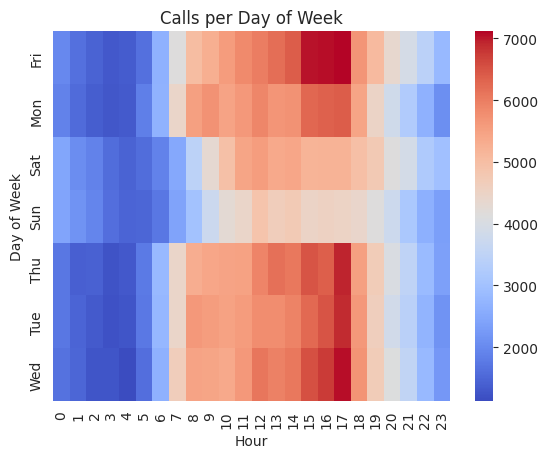

In [237]:
sns.heatmap(pivoted_calls, cmap='coolwarm')
plt.title('Calls per Day of Week')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

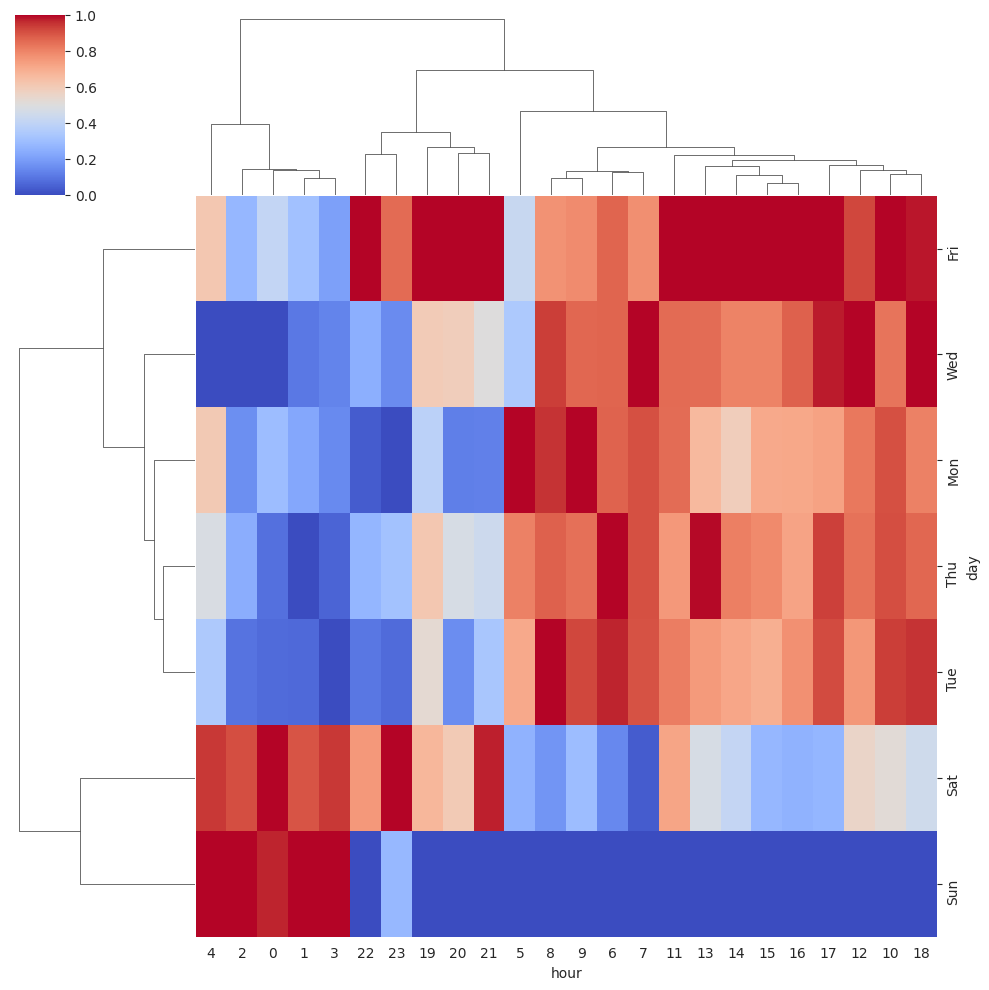

In [238]:
sns.clustermap(pivoted_calls, standard_scale=1, cmap='coolwarm')

In [239]:
pivoted_calls_month = df.groupby(['day', 'month']).count()['lat'].unstack()
pivoted_calls_month

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


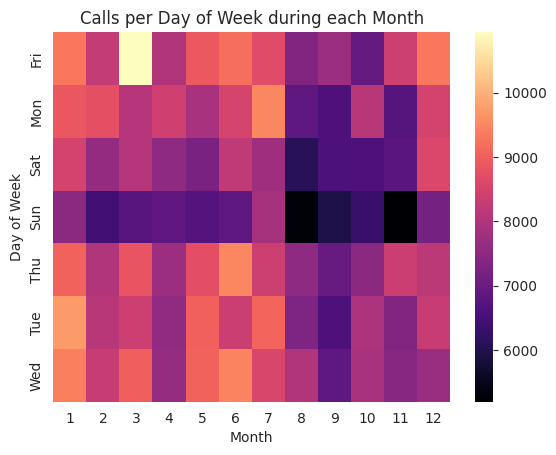

In [240]:
sns.heatmap(pivoted_calls_month, cmap='magma')
plt.title('Calls per Day of Week during each Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

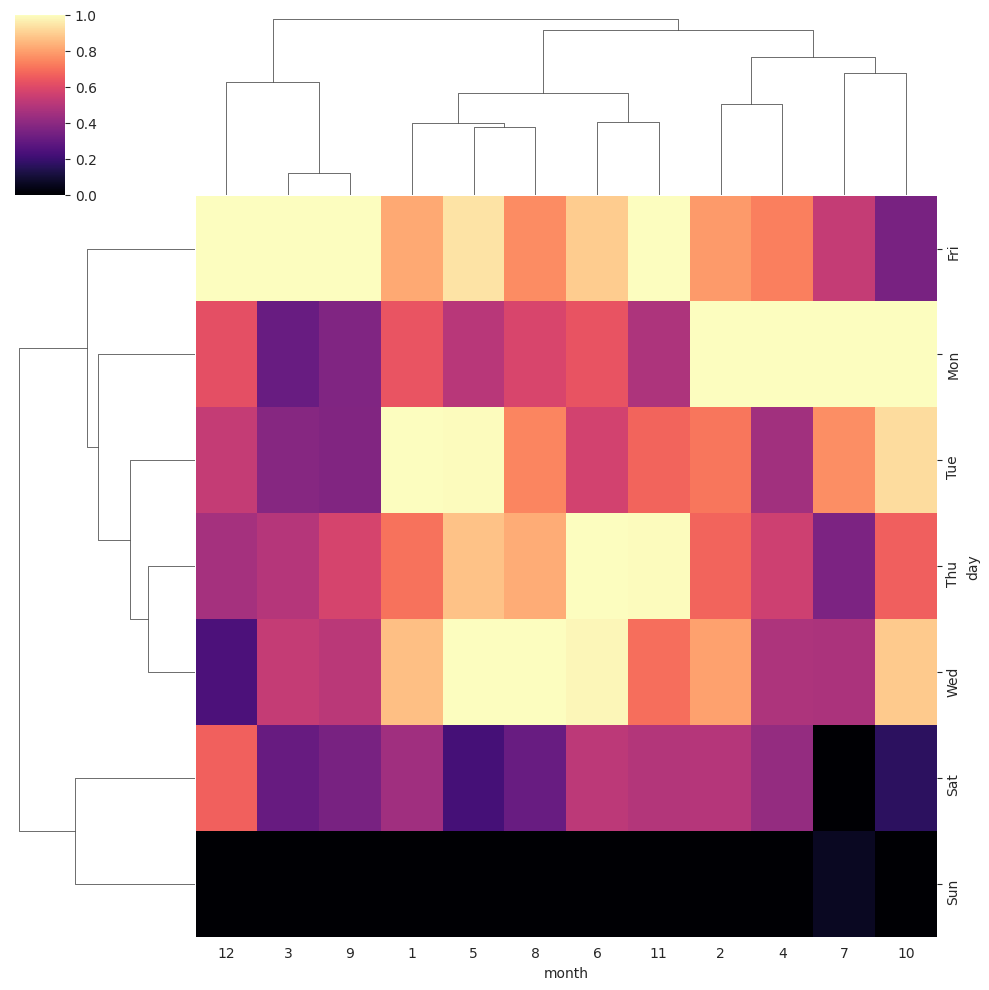

In [241]:
sns.clustermap(pivoted_calls_month, standard_scale=1, cmap='magma')